<a href="https://colab.research.google.com/github/raulFuzita/cct_data_visualisation_communication/blob/CA1/DVC_CA_Marina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization and Communication CA

*Lecturer:* Marina

*Students*

.   Fatime Reisenleitner - id: 2020491 

.   Raul Macedo Fuzita - id: 2018337



##**1. Business Understanding:**

###**Objectives:**

Our team has decided to work in liason with the **healthcare** sector gathering their **global dataset** from **2020**, to investigate and provide information and possible advice regarding the Covid situation. This is a very relevant topic as the pandemic is still very much present in and effecting our daily lives. 



###**Problem Domain**:
----------------------------------------------------------------------
> *Healthcare sector wishes to implement the best approach to dealing with the Covid situation and for this reason requested the analysis on Global cases.*
----------------------------------------------------------------------

###**Problem Motives:**
We wish to investigate:
* Which **Location** has proven to have a better handling of the situation (with **less deaths and cases**)
* Are there any **peaks during-after major Global festivities**? (Christmas, Black Friday, Valentine's day... Shopping/gathering)
* Has the situation **improved globally**? 


##**2. Data Understanding:**

###**Data Collection:**

We acquired the **covid.csv** dataset from github (https://github.com/raulFuzita/cct_data_visualisation_communication/tree/CA1) which was kindly made available by the global healthcare sector. It contains....


#### Dataset Information

[Covid CSV File](https://corgis-edu.github.io/corgis/csv/covid/)

From the CORGIS Dataset Project

By Dennis Kafura, Melanie Sutphin, Joung Min Choi and Bo Guan
Version 2.0.0, created 10/22/2021
Tags: Covid, Covid-19, pandemic, infection, world health

##### Overview

The data set contains daily reports of Covid-19 cases and deaths in countries worldwide. The data also shows the country’s population and the number of cases per 100,000 people on a rolling 14 day average.

Samples were taken from `31/12/2019` to `14/12/2020`


####**Data Source:**
For our investigation we are using the **CSV** file format which is available at: https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data

###**Data Description:**

To understand the data better we conducted several initial analysis on the data set. This is presented step-by-step below.

The least packages and data for the analysis

In [2]:
import pandas as pd               # Pandas allows multi-dimensional arrays. It's usefull for machine learning, data analysis, and data science
import numpy as np                # Numpy provides function to work with arrays, domain of linear algebra, fourier transformation, and matrices (w3school, NumPy Introduction)
import matplotlib as mpl
import matplotlib.pyplot as plt   # Matplotlib is a low level graph plotting library in python that serves as a visualization utility (w3school, Matplotlib Tutorial). 
import seaborn as sns
import ipywidgets as widgets
import statistics as sts
import datetime as dt
import calendar

In [3]:
# Importing the data set in CSV format and storing it in a object. DF stands for Data Frame.
df = pd.read_csv("https://corgis-edu.github.io/corgis/datasets/csv/covid/covid.csv")

####**Data Size:**
We have decided to verify the data size to make sure we meet the requirements of our investigations, as well as to verify that our dataset is large enough to draw accurate conclusions.

The **Asessment Details** requires a minimum of 10 columns and a minimum of 1500 observations. The data set in question for this analysis, has 53629 observations and 10 columns.

In [ ]:
df.shape

(53629, 10)

As we have demonstrated the dataset is large enough for a reliable  investigations.

###**EDA:**

The `head` function shows the first five observations in a data set. It gives us an overview of the names of the variables and a rough idea of the data in it.

In [ ]:
df.head()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,14,12,2020,746,6,Afghanistan,AFG,38041757,Asia,9.013779
1,13,12,2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776
2,12,12,2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
3,11,12,2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
4,10,12,2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658


The `info` function provides the type of each variable in the data set.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53629 entries, 0 to 53628
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date.Day            53629 non-null  int64  
 1   Date.Month          53629 non-null  int64  
 2   Date.Year           53629 non-null  int64  
 3   Data.Cases          53629 non-null  int64  
 4   Data.Deaths         53629 non-null  int64  
 5   Location.Country    53629 non-null  object 
 6   Location.Code       53545 non-null  object 
 7   Data.Population     53629 non-null  int64  
 8   Location.Continent  53629 non-null  object 
 9   Data.Rate           53629 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ MB


The `describe` function plays an important role to start the first steps in the data preparation. Since it provides information such as, min/max, standard deviation, quartiles, and mean of each variables, it makes easier to spot outliers and perhaps unecessary data.

In [ ]:
df.describe()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Data.Population,Data.Rate
count,53629.000000,53629.000000,53629.000000,53629.000000,53629.000000,5.362900e+04,53629.000000
mean,15.845009,6.406776,2019.998751,898.374033,22.873035,4.164579e+07,44.382863
std,8.940220,2.600373,0.035324,5019.868017,124.259355,1.548019e+08,113.147610
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,-1.000000e+00,-147.419587
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.324820e+06,0.269203
50%,16.000000,7.000000,2020.000000,13.000000,0.000000,7.813207e+06,4.652782
75%,24.000000,9.000000,2020.000000,206.000000,3.000000,2.860872e+07,34.905448
max,31.000000,12.000000,2020.000000,102507.000000,4928.000000,1.433784e+09,1900.836210


###**Data Quality Analysis:**

Using a pandas function `isna` combined with `sum` we can check how many NA data exist if exist any in the data set.

The result below shows there are 84 NA values in the `Location.Code` variable.

In [ ]:
pd.isna(df).sum()

Date.Day               0
Date.Month             0
Date.Year              0
Data.Cases             0
Data.Deaths            0
Location.Country       0
Location.Code         84
Data.Population        0
Location.Continent     0
Data.Rate              0
dtype: int64

In [ ]:
# Pandas by default displays up to 10 rows by default. It being half the top 5 rows and the other half the last 5 rows.
pd.options.display.max_rows = None

Once the limit of displayed rows were set, now we can visually analyse the NA observation and decide whether this is a dirty chunk of data or wrong entries.

Unfortunately, in this case, we have more issues than a single column with NA values. The column `Data.Population` does not have the population amount, `Data.Cases` has a negative value.

In [ ]:
df[pd.isna(df['Location.Code'])]

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
9531,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9532,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9533,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9534,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9535,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9536,27,2,2020,14,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9537,26,2,2020,0,1,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9538,25,2,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9539,24,2,2020,57,1,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9540,23,2,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0


In [ ]:
# Setting the Pandas display to the default value. Load the whole data frame will take very long if this value is not reset to the original.
pd.options.display.max_rows = 15

To keep looking for dirty data and outliers we can break it down by removing temporarily some observation. Since we identified the NA values we will remove than so we can move on in our analysis.

In [ ]:
df_numeric = df
df_numeric.dropna(axis=0)

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,14,12,2020,746,6,Afghanistan,AFG,38041757,Asia,9.013779
1,13,12,2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776
2,12,12,2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
3,11,12,2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
4,10,12,2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...
53624,25,3,2020,0,0,Zimbabwe,ZWE,14645473,Africa,0.000000
53625,24,3,2020,0,1,Zimbabwe,ZWE,14645473,Africa,0.000000
53626,23,3,2020,0,0,Zimbabwe,ZWE,14645473,Africa,0.000000
53627,22,3,2020,1,0,Zimbabwe,ZWE,14645473,Africa,0.000000


A quick analysis in this data set is possible to notice that it should not have negative values in any of those 10 variables. For instance, the variable `Dta.Cases` will have either 0 or over than zero cases in a day.

The first step here is to insolate the numerical variables.

In [ ]:
df_numeric = df.iloc[:, [*range(0,5),7,9]]
df_numeric.head()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Data.Population,Data.Rate
0,14,12,2020,746,6,38041757,9.013779
1,13,12,2020,298,9,38041757,7.052776
2,12,12,2020,113,11,38041757,6.868768
3,11,12,2020,63,10,38041757,7.134266
4,10,12,2020,202,16,38041757,6.968658


The next code should answer a simple question of whether there are negative values or not, so we can move one in the analysis.

The result shows if there is/are negative value(s).

In [ ]:
(df_numeric.values < 0).any()

True

If we have negative values we can quickly display them and get the number of negative observations. Negative values in this scenario could indicate outliers.

In [ ]:
check_ng = df_numeric[df_numeric.values < 0]
check_ng

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Data.Population,Data.Rate
5518,2,6,2020,11,0,11801151,-0.813480
5519,1,6,2020,0,0,11801151,-0.906691
5520,31,5,2020,8,0,11801151,-0.906691
5521,30,5,2020,14,0,11801151,-0.974481
5522,29,5,2020,0,0,11801151,-1.093114
...,...,...,...,...,...,...,...
52758,21,10,2020,0,0,-1,0.000000
52759,20,10,2020,0,0,-1,0.000000
52760,19,10,2020,0,0,-1,0.000000
52761,18,10,2020,0,0,-1,0.000000


In [ ]:
# The shape property returns the dimension of the data frame.
check_ng.shape

(150, 7)

Last, but not least we have data that might not contribute to our analysis. The `describe` function gave us important information to take into consideration. The world was more aware of COVID-19 in **2020** which brings the question of whether we have enough measurements in **2019** to really impact our analysis. The short answer is not. As we can see if we filter register cases and deaths in 2019 will find only one observation in China in comparison to the whole country.

In [ ]:
cases2019 = df[df['Date.Year'] == 2019]
cases_deaths_2019 = cases2019[(cases2019['Data.Cases'] > 0) | (cases2019['Data.Deaths'] > 0)]
cases_deaths_2019

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
10848,31,12,2019,27,0,China,CHN,1433783692,Asia,0.0


After another analysis we discovered that **Afghanistan** is the only country with observation untill December. Since we will compare samples agaist countries, we will not need the samples from December.

In [31]:
df[df['Date.Month'] == 12]

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,14.0,12.0,2020.0,746.0,6.0,Afghanistan,AFG,38041757.0,Asia,9.013779
1,13.0,12.0,2020.0,298.0,9.0,Afghanistan,AFG,38041757.0,Asia,7.052776
2,12.0,12.0,2020.0,113.0,11.0,Afghanistan,AFG,38041757.0,Asia,6.868768
3,11.0,12.0,2020.0,63.0,10.0,Afghanistan,AFG,38041757.0,Asia,7.134266
4,10.0,12.0,2020.0,202.0,16.0,Afghanistan,AFG,38041757.0,Asia,6.968658
5,9.0,12.0,2020.0,135.0,13.0,Afghanistan,AFG,38041757.0,Asia,6.963401
6,8.0,12.0,2020.0,200.0,6.0,Afghanistan,AFG,38041757.0,Asia,7.094835
7,7.0,12.0,2020.0,210.0,26.0,Afghanistan,AFG,38041757.0,Asia,7.215755
8,6.0,12.0,2020.0,234.0,10.0,Afghanistan,AFG,38041757.0,Asia,7.326160
9,5.0,12.0,2020.0,235.0,18.0,Afghanistan,AFG,38041757.0,Asia,7.115865


##**3. Data Preparation:**

###**Data Wrangling:**
Treat Outlier & Missing Values

An easy way to remove negative values is to traverse the data frame, check the type of the variable and if the conditions match it is turned into an NA value. Then we can remove all these observation with other NA values.

In [4]:
# The for loop statement will traverse the data frame by name. Then to access the variables, the name in each loop is passed as an index to
# the array and has its type-checked in the if statement.
# If the conditional statement is satisfied the current variable is checked for negative values. If there is any all the
# negative values should become an NA value.
for i in df.columns:
  if (df[i].dtypes == 'int64') | (df[i].dtypes == 'float64'):
    df[df[i] < 0] = np.NaN

We can apply a similar technique to select all measurements from 2019, and then remove them. Similarly to the 12th month.

In [5]:
# Numpy package provides a property to change a value to NA value.
df[df['Date.Year'] < 2020] = np.NaN

In [6]:
df[df['Date.Month'] == 12] = np.NaN

In the end, we can sum all the NA observations and display them. All the original NA values, negative values and unnecessary observations from 2019 is a total of 212 observations.

In [7]:
pd.isna(df).sum()

Date.Day              226
Date.Month            226
Date.Year             226
Data.Cases            226
Data.Deaths           226
Location.Country      226
Location.Code         226
Data.Population       226
Location.Continent    226
Data.Rate             226
dtype: int64

Now all the NA observations can be removed safely.

In [8]:
df.dropna(axis=0, inplace=True)

Let's visualize a summary of the data set again and see if we can pick any other outliers. We can start asking if the maximum of deaths is compatible with a trustworthy  source.

In [40]:
df.describe()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Data.Population,Data.Rate
count,53403.000000,53403.000000,53403.0,53403.000000,53403.000000,5.340300e+04,53403.000000
mean,15.827856,6.402075,2020.0,902.300170,22.926746,4.168775e+07,44.582414
std,8.926744,2.589605,0.0,5029.944863,123.121507,1.548747e+08,113.310025
min,1.000000,1.000000,2020.0,0.000000,0.000000,8.150000e+02,0.000000
25%,8.000000,4.000000,2020.0,0.000000,0.000000,1.324820e+06,0.288458
50%,16.000000,7.000000,2020.0,13.000000,0.000000,7.813207e+06,4.711048
75%,24.000000,9.000000,2020.0,208.000000,3.000000,2.860872e+07,35.166036
max,31.000000,11.000000,2020.0,102507.000000,4928.000000,1.433784e+09,1900.836210


The website [Worldometer](https://www.worldometers.info/coronavirus/) provides information about cases and deaths related to Covid-19.

According to the worldometer the highest number of daily deaths are 15558 in 2020. Therefore our data set doesn't seem to have outliers related to deaths.

We can display the number of deaths on each day of the year in 2020. Later we will be able to break it down and answer where the highest rate is and analyse it deeply.

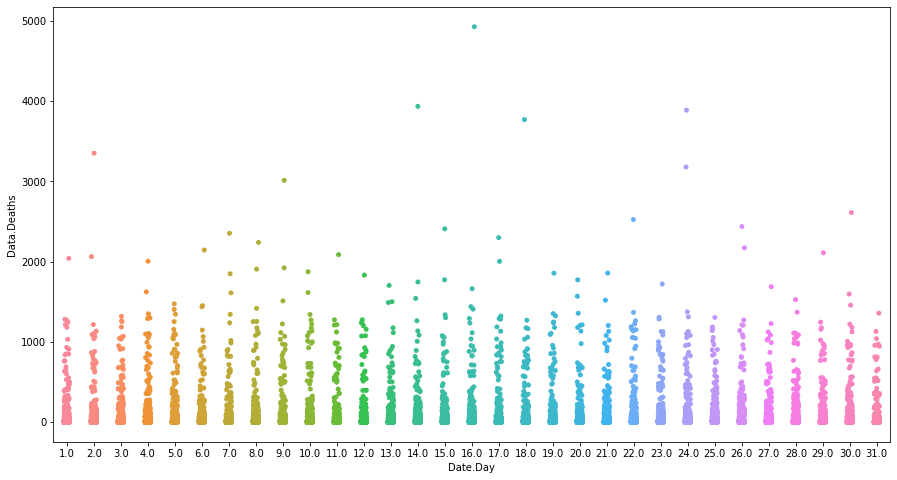

In [41]:
plt.figure(figsize=(15,8))
sns.stripplot(x='Date.Day', y='Data.Deaths', data=df, jitter=True,)

###**Feature Engineering:**
PCA, Dimension Reduction/Selection

##**4. Data Modelling:**

## **5. Evaluation:**

##**6. Deployment:**

## **Challenges:**

The Covid situation is a very sensitive topic and every nation has dealt with it in a different manner, hence we can only advice based on their records. 

* Humans are very much irrational with **Cognitive bias**. And this has been the foundation of their reactions to Covid. Hence it is impossible to dictate what people can or will do.
* There is a constant **clash of interest** with how to handle the pandemic.
 - Financial specialist: **economy** suffers with lockdowns
 -  Health professionals consider the worth of **human life** which requires the stop of spreading
* Our **data** also is **limited** in the sense that we lack information about:
 - Covid variations 
 - number of vaccinated and it's effectiveness in the population 
 - any quarantine, lock-downs 

* Due to the very **limited time** constraint and extremely **small group** (of 2) we had to:
 - **disregard** certain situations
    * The number of cases can differ based on population size

 - make **assumptions**
    * geographic Regions (Island vs Continent) have the same conditions
    * Population is not influenced by travelling (i.e. any changes to population are due to birth or death rate) 

##Test

In [9]:
import numpy as np
import statistics as sts
import numpy as np

def zscore(col):
  return (col - col.mean()) / np.std(col)

def mmnorm(col):
  return (col - col.min()) / (col.max() - col.min())

def invskew(col):
  return (3*(col.mean() - sts.median(col))) / np.std(col)

# -----------------------------------------------------------------
# Author: Raul Macedo Fuzita
# Date: 01/12/2021
# All rights reserved
def pivot_melt(data, column, value, fill=0, filter=None):
  if (type(filter) is list) | (type(filter) is np.ndarray) & (len(filter) > 0):
    data = data[np.isin(data, filter)]
  colnames = data.loc[:,column].unique()
  newdf = pd.DataFrame()
  for name in colnames:
    col = data[data[column] == name][value]
    temp = pd.DataFrame({name:col.values})
    newdf = pd.concat([newdf, temp], axis=1)
  newdf.fillna(fill, inplace=True)
  return newdf


def plot_bubble(data, xticks=None, areasize=50, alpha=0.5):
  legends = data.columns.unique()
  if (type(xticks) is list) | (type(xticks) is np.ndarray):
    plt.xticks(np.arange(len(xticks)), xticks)
  for col in data.columns:
    plt.scatter(data[col].index, data[col], s=data[col]/areasize, alpha=alpha)
  plt.legend(legends)

In [43]:
df.head()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
14,30.0,11.0,2020.0,0.0,0.0,Afghanistan,AFG,38041757.0,Asia,6.416633
15,29.0,11.0,2020.0,228.0,11.0,Afghanistan,AFG,38041757.0,Asia,6.845110
16,28.0,11.0,2020.0,214.0,15.0,Afghanistan,AFG,38041757.0,Asia,6.784650
17,27.0,11.0,2020.0,0.0,0.0,Afghanistan,AFG,38041757.0,Asia,6.395604
18,26.0,11.0,2020.0,200.0,12.0,Afghanistan,AFG,38041757.0,Asia,7.341932


In [10]:
cases_deaths = df.groupby(by=['Location.Country'], as_index=False).agg({
    'Data.Cases':'sum',
    'Data.Deaths':'sum',
    'Data.Population':'max'
})
cases_deaths_date = df.groupby(['Date.Month', 'Date.Day'], as_index=False)[['Data.Cases', 'Data.Deaths']].apply(sum)

### Find 4 countries with the highest deaths.

In [11]:
country4_hd = cases_deaths.sort_values('Data.Deaths')[-4:]
country4_hd.head()

,Location.Country,Data.Cases,Data.Deaths,Data.Population
126,Mexico,943630.0,93228.0,1.275755e+08
91,India,8364086.0,124315.0,1.366418e+09
27,Brazil,5590025.0,161106.0,2.110495e+08
202,United_States_of_America,9486486.0,233729.0,3.290649e+08


In [12]:
df_sortedbydm = df.sort_values(by=['Date.Month', 'Date.Day'])
filter = country4_hd['Location.Country'].values
dfplot = pivot_melt(df_sortedbydm, 'Location.Country', 'Data.Deaths', filter=filter)

In [47]:
#@title Run this cell and select a country from the select area.

default = dfplot.columns.unique()
options = default.append(pd.Index(['Default']))
four_country_picker = widgets.SelectMultiple(
    options=options,
    value=list(options),
    description='Countries: '
)

@widgets.interact(symbols=four_country_picker)
def render(symbols):
  if 'Default' in symbols:
    symbols = tuple(options)
  selected = dfplot[dfplot.columns[dfplot.columns.isin(symbols)]]
  plt.figure(figsize =(12, 9))
  plt.plot(cases_deaths_date['Data.Deaths'])
  plt.plot(selected)
  plt.xlabel('Days in a Year', fontsize=14)
  plt.ylabel('Deaths\' rate', fontsize=14)
  plt.title('Total Deaths vs Country\'s Deaths', fontsize=16)
  plt.legend(['Total Deaths']+list(symbols))
  plt.show()

interactive(children=(SelectMultiple(description='Countries: ', index=(0, 1, 2, 3, 4), options=('Brazil', 'Ind…

### Compare the deaths and cases.

<Figure size 720x504 with 0 Axes>

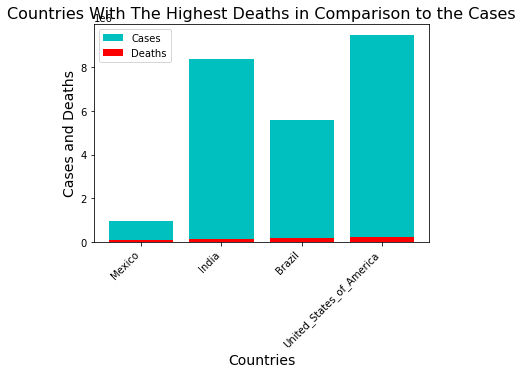

In [13]:
plt.figure(figsize =(10, 7))
country = country4_hd['Location.Country'].values
pos = np.arange(len(country))

ax = plt.subplots()
plt.bar(pos, country4_hd['Data.Cases'], color='c', label='Cases')
plt.bar(pos, country4_hd['Data.Deaths'], color='r', label='Deaths')
plt.xticks(pos, country, color='black', rotation=45, horizontalalignment='right')

plt.xlabel('Countries', fontsize=14)
plt.ylabel('Cases and Deaths', fontsize=14)
plt.title('Countries With The Highest Deaths in Comparison to the Cases', fontsize=16)
plt.legend()
plt.show()

### Find out if those country have the highest cases in each month, too.

In [14]:
month_cd = df.groupby(['Date.Month'], as_index=False).agg({
    'Data.Cases':'sum',
    'Data.Deaths':'sum'
})

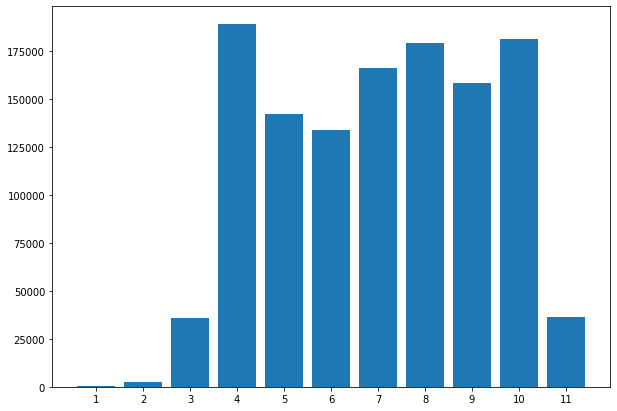

In [15]:
plt.figure(figsize =(10, 7))
plt.bar(month_cd['Date.Month'], month_cd['Data.Deaths'], tick_label=(month_cd.index+1))
plt.show()

In [16]:
country_month_cd = df.groupby(['Date.Month', 'Location.Country'], as_index=False).agg({
    'Data.Cases':'sum',
    'Data.Deaths':'sum',
    'Data.Population':'max'
})

In [17]:
country4_hdc_month = pivot_melt(country_month_cd, 'Location.Country', 'Data.Deaths', filter=filter)

In [18]:
merged_hdc_month = pd.concat([country4_hdc_month, month_cd['Data.Deaths']], axis=1)
merged_hdc_month.rename(columns={'Data.Deaths':'Total per Month'}, inplace=True)

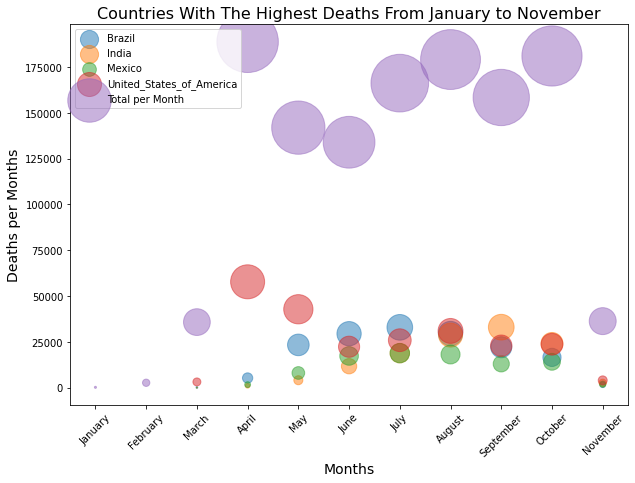

In [19]:
monthsname = []
for mn in merged_hdc_month.index+1:
  monthsname.append(calendar.month_name[mn])

plt.figure(figsize =(10, 7))
plot_bubble(merged_hdc_month, monthsname)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Deaths per Months', fontsize=14)
plt.title('Countries With The Highest Deaths From January to November', fontsize=16)
plt.xticks(rotation=45)
plt.show()

### What are the variance per month for those 4 country

In [20]:
mdf = df[df['Date.Month'] == 10]

In [21]:
mdf[mdf['Data.Deaths'] == mdf['Data.Deaths'].max()][['Date.Month', 'Location.Country', 'Data.Deaths']]

,Date.Month,Location.Country,Data.Deaths
1843,10.0,Argentina,3351.0


In [27]:
mdf[(mdf['Date.Month'] == 10) & (mdf['Data.Deaths'] == mdf['Data.Deaths'].max())]

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
1843,2.0,10.0,2020.0,14001.0,3351.0,Argentina,ARG,44780675.0,America,393.004348


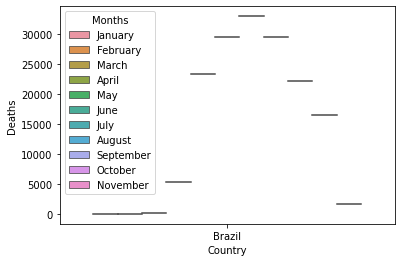

In [276]:
sns.violinplot(x='Country', y='Deaths', data=br, hue='Months')

### What continent are they?

In [ ]:
country4_names = country4_hdc_month.columns

In [ ]:
country_continent = pd.DataFrame()
for k, v in df[df['Location.Country'].isin(country4_names)].groupby(['Location.Country', 'Location.Continent']):
  temp = pd.DataFrame({
      'country':[k[0]],
      'continent':[k[1]],
  })
  country_continent = country_continent.append(temp, ignore_index=True)

In [ ]:
country_continent

,country,continent
0,Brazil,America
1,India,Asia
2,Mexico,America
3,United_States_of_America,America


### Is there any correlation between population, cases, and deaths?

In [ ]:
pcd = cases_deaths.iloc[:, 1:]

In [ ]:
pcd.corr()

,Data.Cases,Data.Deaths,Data.Population
Data.Cases,1.000000,0.939738,0.542448
Data.Deaths,0.939738,1.000000,0.425485
Data.Population,0.542448,0.425485,1.000000


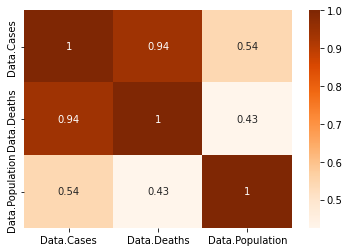

In [ ]:
sns.heatmap(pcd.corr(), annot=True, cmap='Oranges')